# **TTI109 - Estatística**
# **Laboratório 08 - Distribuição Normal de Probabilidade**

Nessa aula vamos aprender a construir:

* Identificar distribuições normais de probabilidade;
* Estimar média e desvio padrão de uma distribuição normal;
* Padronizar uma distribuição normal usando escores-z;
* Empregar tabelas de distribuição normal padrão para determinar probabilidades;
* Empregar a ferramenta Python como alternativa ao uso das tabelas de distribuição normal padrão.

## **A curva normal**
Uma distribuição normal de probabilidade é completamente definida pelos dois parâmetros de sua função densidade de probabilidade: a média $\mu$ e o desvio padrão $\sigma$:

\begin{align}
        \text{pdf}(x)=\mathscr{N}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

No Python, usaremos o método `pdf` *(probability density function)* da classe `stats.norm` (biblioteca `scipy`).

### **Exemplo:**

In [24]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [25]:
# Criação de uma distribuição normal com média 1.5 e desvio padrão 2.0
media, desvpad = 1.5, 2.0
distnorm = stats.norm(media, desvpad)

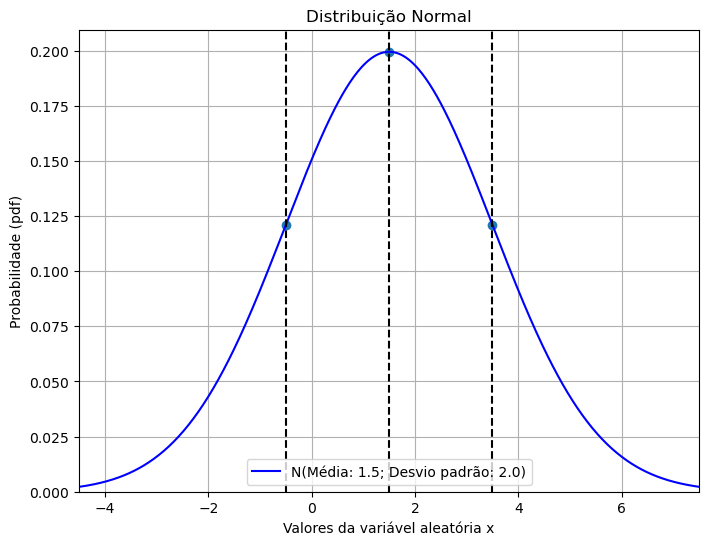

In [30]:
## Representação gráfica

# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)

# Cálculo da fdp normal para os valores do vetor x
y = distnorm.pdf(x)

# print('Valores de x')
# print(x)
# print('\nValores de y')
# print(y)

## Gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
plt.title('Distribuição Normal')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade (pdf)')
plt.scatter([media - desvpad, media, media + desvpad], [distnorm.pdf(media-desvpad), distnorm.pdf(media), distnorm.pdf(media+desvpad)])
plt.vlines([media-desvpad, media, media+desvpad], 0, distnorm.pdf(media)+0.01, colors='k', linestyles='dashed')
plt.grid()
plt.legend(['N(Média: ' + str(media) + '; Desvio padrão: ' + str(desvpad) + ')'])
plt.show()

## **Plotando várias distribuições normais**

In [4]:
# Médias e desvios padrão
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]

# Cores das curvas: preto, verde, azul e vermelho
cores = ['k', 'g', 'b', 'r']

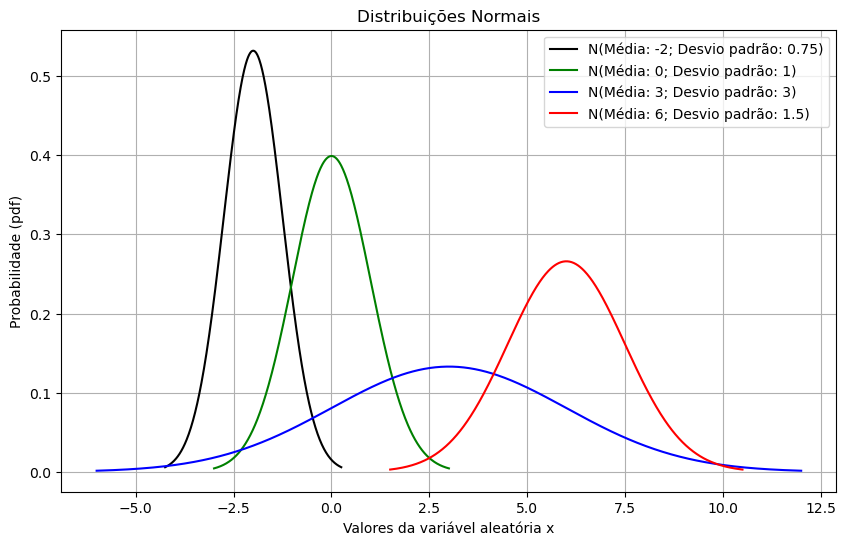

In [5]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Cria a lista para as legendas
legenda = []

# Plotagem dos gráficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = stats.norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  legenda.append('N(Média: ' + str(mu) + '; Desvio padrão: ' + str(std) + ')')
  plt.plot(x, y, cor)

# Atributos do gráfico
plt.title('Distribuições Normais')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade (pdf)')
plt.legend(legenda)
plt.grid(True)
plt.show()

## **Probabilidades na curva normal padrão**

*   Encontre a área acumulada que corresponde a um escore-z de –2,19.
*   Encontre a área acumulada que corresponde a um escore-z de 2,17.
*   Encontre a área sob a curva normal padrão à direita de z = 1,06.
*   Encontre a área sob a curva normal padrão entre z = –1,5 e z = 1,25.




Usaremos os métodos `cdf` *(Cumulative distribution function)* para áreas à esquerda de um escore-z e `sf` *(Survival function, definida como sf = 1 - cdf)* para áreas à direita.

In [6]:
# Definição da distribuição normal padrão
media, std = 0, 1
normpad = stats.norm(media, std)

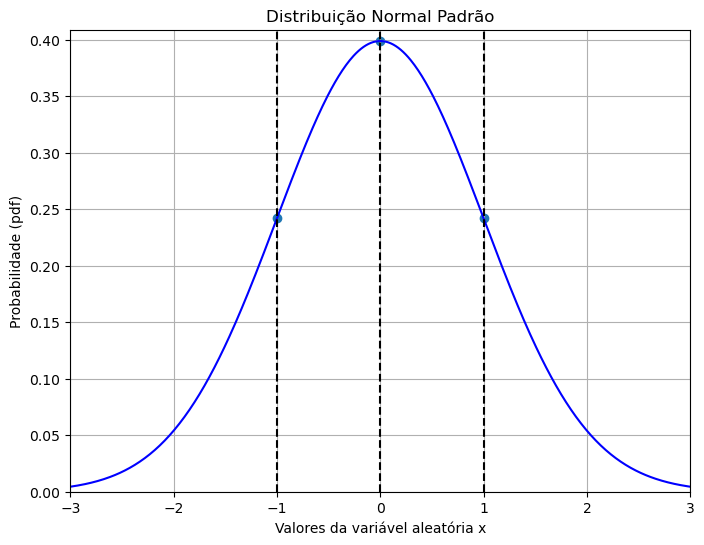

In [7]:
## Representação gráfica


# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*std, media+3*std
x = np.linspace(INICIO, FIM, QUANT)

# Cálculo da fdp normal para os valores do vetor x
y = normpad.pdf(x)


# # Gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, normpad.pdf(media)+0.01)
plt.title('Distribuição Normal Padrão')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade (pdf)')
plt.scatter([media - std, media, media + std], [normpad.pdf(media-std), normpad.pdf(media), normpad.pdf(media+std)])
plt.vlines([media-std, media, media+std], 0, normpad.pdf(media)+0.01, colors='k', linestyles='dashed')
plt.grid()
plt.show()

In [8]:
# Área acumulada que corresponde a um escore-z de –2,19
area1 = normpad.cdf(-2.19)
print(f'Área acumulada que corresponde a um escore-z de –2,19: {area1:.4f}')


Área acumulada que corresponde a um escore-z de –2,19: 0.0143


In [9]:
# Área acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'Área acumulada que corresponde a um escore-z de 2,17: {area2:.4f}')


Área acumulada que corresponde a um escore-z de 2,17: 0.9850


In [10]:
# Área sob a curva normal padrão à direita de z = 1,06
area3 = 1 - normpad.cdf(1.06)
print(f'Área sob a curva normal padrão à direita de z = 1,06: {area3:.4f}')

Área sob a curva normal padrão à direita de z = 1,06: 0.1446


In [11]:
# Área sob a curva normal padrão entre z = –1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'Área sob a curva normal padrão entre z = –1,5 e z = 1,25: {area4:.4f}')

Área sob a curva normal padrão entre z = –1,5 e z = 1,25: 0.8275


# Encontrando escores-z

#### **Exemplo:**

Dada uma área (uma probabilidade), qual o correspondente escore-z relativo à uma distribuição normal padrão? 

O método *ppf (Percent Point Function)* da classe *stats.norm* resolve esse problema.

*   Determine o escore-*z* que tenha 96,16% da área de distribuição à sua direita.
*   Determine o escore-*z* para o qual 95% da área de distribuição esteja entre *–z* e *z*.


In [12]:
# Bibliotecas
from scipy import stats

# Construindo a distribuição normal padrão
mu, std = 0, 1
normpad = stats.norm(mu, std)

# Escore-z que tenha 96,16% da área de distribuição à sua direita
z1 = normpad.ppf(1-0.9616)
print(f'z1 = {z1:.3f}')
print(f'Área à direita = {normpad.sf(z1)*100:.2f}%\n')

# Escore-z para o qual 95% da área de distribuição esteja entre –z e z
z2 = normpad.ppf(0.05)
print(f'z2 = {z2:.3f}')
print(f'Área à esquerda de z = {z2:.3f} é {normpad.cdf(z2)*100:.2f}%')
print(f'Área à direita de z = {-z2:.3f} é {normpad.sf(-z2)*100:.2f}%')

z1 = -1.770
Área à direita = 96.16%

z2 = -1.645
Área à esquerda de z = -1.645 é 5.00%
Área à direita de z = 1.645 é 5.00%


#### **Exercício:** 

Um pesquisador testa as distâncias de frenagem de diversos carros. A distância de frenagem de 60 milhas por hora até uma parada completa em pista seca é medida em pés. As distâncias de frenagem de uma
amostra de carros são normalmente distribuídas, com média de 129 pés e desvio padrão de 5,18 pés.

Qual é a maior distância de frenagem que um desses carros poderia ter e ainda estar no grupo do 1% mais baixo? (*Adaptado de: Consumer Reports*)

In [13]:
# Construindo a distribuição normal das distâncias de frenagem
m, std = 129, 5.18
normpad = stats.norm(m, std)

# Distância máxima com 1% da área de distribuição à sua esquerda
dist1 = normpad.ppf(0.01)
print(f'Distância máxima com 1% da área de distribuição à sua esquerda: {dist1:.2f} pés')
print(f'Area à esquerda de {dist1:.2f} pés: {normpad.cdf(dist1)*100:.2f}%')




Distância máxima com 1% da área de distribuição à sua esquerda: 116.95 pés
Area à esquerda de 116.95 pés: 1.00%


### **Exercício:**

O tempo de trabalho dos funcionários em uma empresa é normalmente distribuído, com média de 11,2 anos e desvio padrão de 2,1 anos.

Em uma redução de quadro, os 10% com menos tempo na empresa são demitidos. Qual é o tempo máximo que um funcionário pode ter trabalhado na empresa e ainda assim ser cortado?

In [14]:
# Construindo a distribuição normal dos tempos de empresa
m, std = 11.2, 2.1
normpad = stats.norm(m, std)


# Tempo de empresa máximo com 10% da área de distribuição à sua esquerda
tempo1 = normpad.ppf(0.10)
print(f'Tempo de empresa máximo com 10% da área de distribuição à sua esquerda: {tempo1:.2f} anos')
print(f'Área à esquerda de {tempo1:.2f} anos: {normpad.cdf(tempo1)*100:.2f}%')




Tempo de empresa máximo com 10% da área de distribuição à sua esquerda: 8.51 anos
Área à esquerda de 8.51 anos: 10.00%


# Distribuições amostrais

### **Exemplo:**

Os valores populacionais $\{1, 3, 5, 7\}$ são equiprováveis. Esses valores são escritos em pedaços de papel e colocados em uma caixa. Então, selecionam-se dois pedaços de papel aleatoriamente, com reposição.

*   **(a)** Liste todas as amostras possíveis de tamanho $𝑛 = 2$ e calcule suas respectivas médias.
*   **(b)** Encontre a média, a variância e o desvio
padrão das médias amostrais.
*   **(c)** Compare seus resultados com a média $\mu = 4$,
variância $\sigma^2 = 5$, e desvio padrão $\sigma \approx 2,236$ da população.




In [15]:
## Item (a)

# Bibliotecas
import itertools as it
import pandas as pd

# Chave para permutação
chave = [1, 3, 5, 7]
# Geração de todas as amostras possíveis de tamanho 2
am2a2 = list(it.product(chave, repeat=2))
# Criação de tabela com possíveis amostras, acompanhadas de suas médias
amostras = pd.DataFrame({'Amostras': am2a2,
                        'Média': [(x1+x2)/2 for (x1, x2) in am2a2]})
display(amostras)

,Amostras,Média
0,"(1, 1)",1.0
1,"(1, 3)",2.0
2,"(1, 5)",3.0
3,"(1, 7)",4.0
4,"(3, 1)",2.0
5,"(3, 3)",3.0
6,"(3, 5)",4.0
7,"(3, 7)",5.0
8,"(5, 1)",3.0
9,"(5, 3)",4.0


In [16]:
## Item (b)

# Determinação da frequência de cada média
contagem = amostras['Média'].value_counts().sort_index()
# Criação de tabela com as possíveis médias e suas respectivas probabilidades
dist_prob = pd.DataFrame({'Médias': contagem.index,
                         'Frequência': contagem})
dist_prob['Probabilidade'] = dist_prob['Frequência'] / dist_prob['Frequência'].sum()
display(dist_prob)
# Cálculo da média das médias amostrais
media_amostras = (dist_prob['Médias']*dist_prob['Probabilidade']).sum()
print(f'Média das médias amostrais = {media_amostras:.2f}')
# Cálculo da variância das médias amostrais
var_amostras = (dist_prob['Médias']**2*dist_prob['Probabilidade']).sum() - media_amostras**2
print(f'Variância das médias amostrais = {var_amostras:.2f}')
# Cálculo do desvio padrão das médias amostrais
std_amostras = var_amostras**(1/2)
print(f'Desvio padrão das médias amostrais = {std_amostras:.2f}')

,Médias,Frequência,Probabilidade
Média,,,
1.0,1.0,1,0.0625
2.0,2.0,2,0.1250
3.0,3.0,3,0.1875
4.0,4.0,4,0.2500
5.0,5.0,3,0.1875
6.0,6.0,2,0.1250
7.0,7.0,1,0.0625


Média das médias amostrais = 4.00
Variância das médias amostrais = 2.50
Desvio padrão das médias amostrais = 1.58


In [17]:
## Item (c)

mu, std = 4, 5**(1/2)
print('De acordo com a teoria das distribuições amostrais:')
print(f'A média mu_x = {media_amostras:.2f} deve ser igual a média populacional mu = {mu}.')
print(f'O desvio padrão sigma_x = {std_amostras:.2f} deve ser igual a sigma/raiz(n) = {std/(2**(1/2)):.2f}')

De acordo com a teoria das distribuições amostrais:
A média mu_x = 4.00 deve ser igual a média populacional mu = 4.
O desvio padrão sigma_x = 1.58 deve ser igual a sigma/raiz(n) = 1.58


# Probabilidades e o TLC

### **Exercício:**

O gasto médio com alojamento e refeição, por ano, em faculdades de quatro anos é de US\$ 9.126,00. Você seleciona aleatoriamente 9 dessas faculdades. Qual é a probabilidade de que a média de gastos com alojamento e refeição seja menor que US\$ 9.400,00?

Suponha que os gastos com alojamento e refeição sejam normalmente distribuídos, com desvio padrão de US$ 1.500,00 (*Adaptado de: National Center for
Education Statistics*).

In [18]:
# Determinação da média e desvio padrão amostrais
mu,std, n = 9126, 1500, 9
mu_x , std_x = m, std/(n**(1/2))


# Geração da distribuição normal amostral (TLC)
normpad = stats.norm(mu_x, std_x)


# Cálculo da probabilidade
prob = normpad.cdf(9400)
print(f'Probabilidade de que a média amostral seja menor que 9400: {prob:.4f}')



Probabilidade de que a média amostral seja menor que 9400: 1.0000


### **Exercício:**

A dívida média no cartão de crédito mantida por universitários é normalmente distribuída, com média de US\$ 3.173,00 e desvio padrão de
US\$ 1.120,00 (*Adaptado de: Sallie Mae*).

*   Qual é a probabilidade de que um universitário selecionado aleatoriamente,
que possui um cartão de crédito, tenha uma divida menor
que US\$ 2.700?
*   Você seleciona aleatoriamente 25 universitários que possuem cartão
de crédito. Qual é a probabilidade de que a média dessas dívidas
médias seja menor que US\$ 2.700?

In [19]:
# No primeiro item, devemos calcular a probabilidade associada a um determinado
# valor da variável aleatória dívida no cartão de crédito.
mu, std = 3173, 1120

# Geração da distribuição normal da população
normpad = stats.norm(mu, std)

# Cálculo da probabilidade
gastos = normpad.cdf(2700)
gastos = gastos*100
print(f'Probabilidade de que um cliente tenha dívida inferior a $2700: {gastos:.2f}%')

# No segundo item, devemos calcular uma probabilidade associada a uma
# média amostral.
mu, std, n = 3173, 1120, 25
mu_x, std_x = mu, std/(n**(1/2))

# Geração da distribuição das médias amostrais
normpad = stats.norm(mu_x, std_x)

# Cálculo da probabilidade
gastos = normpad.cdf(2700)
gastos = gastos*100
print(f'Probabilidade de que a média de 25 clientes tenha dívida inferior a $2700: {gastos:.2f}%')


Probabilidade de que um cliente tenha dívida inferior a $2700: 33.64%
Probabilidade de que a média de 25 clientes tenha dívida inferior a $2700: 1.74%
